In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Simple  Gradient Descent

In [8]:
# def gradient_descent(grad,w,learning_rate=0.1 , n_steps=20):
#   w=np.array(w)
#   path=[w.copy()]  # for visualize
#   for step in range(n_steps):
#     grad_w=grad(w)
#     w=w-learning_rate *grad_w
#     path.append(w.copy())
#   return np.array(path)

In [9]:
def generate_data(n=50, noise=5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

In [10]:
def h_w(x, w):
    return w[0] + w[1] * x  # equivalent to w_0 + w_1 * x


In [11]:
# SSE cost function
def cost_function(X, y, w):
    return np.sum((h_w(X, w) - y)**2) / len(X)



In [12]:
# Batch Gradient Descent (BGD)
def gradient_descent(X, y, w, alpha, num_iters):
    m = len(X)
    cost_history = []
    w_history = [w.copy()]

    for i in range(num_iters):
        # updates
        gradient_w0 = np.sum(h_w(X, w) - y) / m
        gradient_w1 = np.sum((h_w(X, w) - y) * X) / m
        w[0] -= alpha * gradient_w0
        w[1] -= alpha * gradient_w1

        cost_history.append(cost_function(X, y, w))
        w_history.append(w.copy())  # Store a copy of w, not the reference

    return w, cost_history, w_history


In [13]:

X, y = generate_data(n=50, noise=5.0)
w_initial = [0, 0]  # Start with w0 = 0, w1 = 0
eta = 0.05  # Learning rate
num_iters = 500

# Run Gradient Descent
w_final, cost_history, w_history = gradient_descent(X, y, w_initial, eta, num_iters)



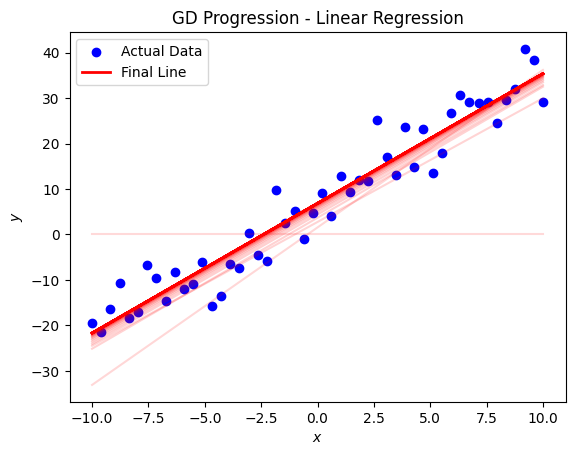

In [14]:
# Visualize cost function (log of J(w))
w0_vals = np.linspace(-10, 20, 100)
w1_vals = np.linspace(-1, 5, 100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = [w0_vals[i], w1_vals[j]]
        J_vals[i, j] = cost_function(X, y, w)

# Plot GD Progression (without labels for lines, different alphas)
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot lines for every 50th step with increasing alpha
for idx, w in enumerate(w_history[::num_iters // 100]):
    alpha = 0.15 + 0.85*(idx) / 100  # Gradually increase alpha for each line
    plt.plot(X, h_w(X, w), color='red', alpha=alpha)

# Final line in bold
plt.plot(X, h_w(X, w_final), color='red', lw=2, label='Final Line')

plt.title("GD Progression - Linear Regression")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

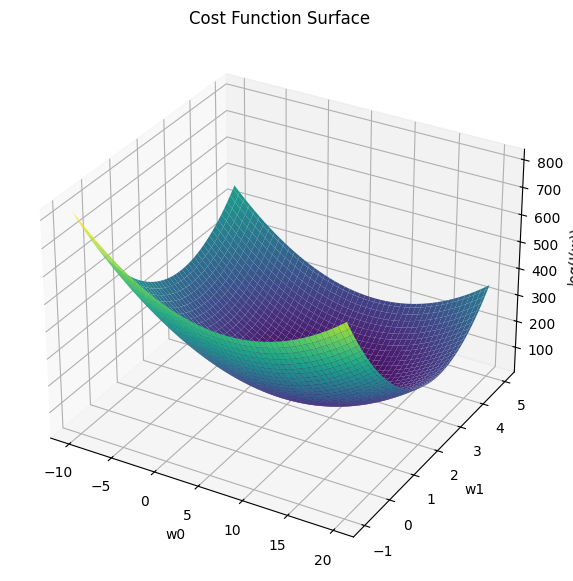

In [15]:
# 3D Plot of J(w)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, J_vals.T, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface")
plt.show()

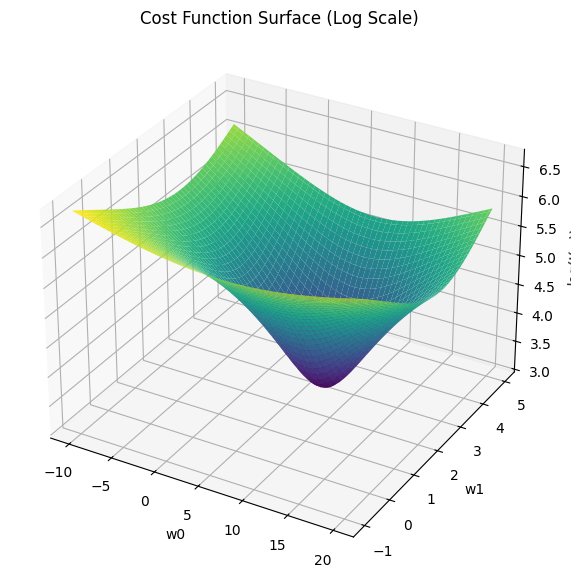

In [16]:
# 3D Plot of log J(w)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, np.log(J_vals.T), cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface (Log Scale)")
plt.show()

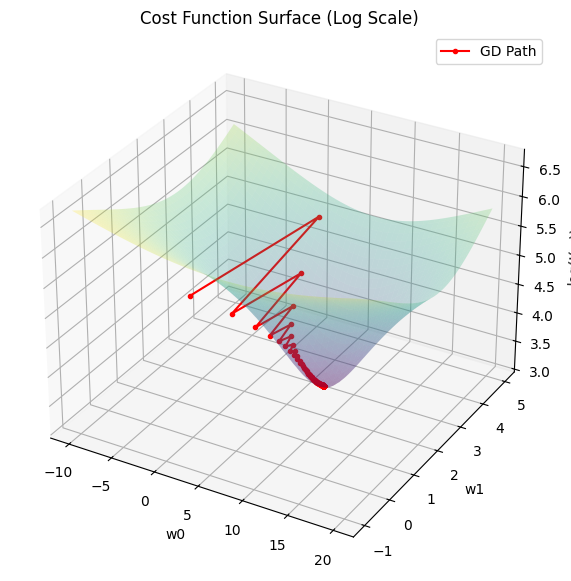

In [ ]:


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, np.log(J_vals.T), cmap='viridis', alpha=0.25)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface (Log Scale)")

# Plot the points on the 3D surface for each GD iteration
w_history_array = np.array(w_history)  # Convert list to array for easier slicing
w0_history = w_history_array[:, 0]
w1_history = w_history_array[:, 1]
cost_history_log = np.log(np.array(cost_history))  # Log of the cost history

# Plot the path of gradient descent in 3D
ax.plot(w0_history[:num_iters], w1_history[:num_iters], cost_history_log, marker='o', color='r', label='GD Path', markersize=3)

plt.legend()
plt.show()